Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Below, please fill in your name and collaborators:

In [50]:
NAME = "Miguel Morales"
COLLABORATORS = ""

# Assignment 3 - Time Series Analysis
**(15 points total)**

## Assignment tasks:

In this assignment you will conduct time series analysis of the financial data. 

1. Setup your environment to access and download latest stock data. Please see instructions below for different tools you can use to get the data. You can use any of the options provided, either Quandl or Yahoo Finance. If you know of any other service to download the data, please use that service, provide an explanation in the comments.

2. *(2 points)* Download the **adjusted** close prices for FB, MMM, IBM and AMZN for the last 60 months. If you run into any issues downloading the data from online sources, you can use `.csv` files provided. This will not affect your grade for the assignment.

3. *(3 points)* Resample the data to get prices for the end of the **business** month. Select the **Adjusted Close** for each stock.

4. *(3 points)* Use the pandas `autocorrelation_plot()` function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks.
    - Are they autocorrelated?
    - Provide short explanation.

5. *(4 points)* 
    - Calculate the monthly returns for each stock using the "shift trick" explained in the lecture, using `shift()` function. 
    - Use pandas `autotocorrelation_plot()` to plot the autocorrelation of the monthly returns.
    - Are the returns autocorrelated? Provide short explanation.

6. *(3 points)*
    - Combine all 4 time series (returns) into a single DataFrame,
    - Visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix (use `scatter_matrix()` function from `pandas.plotting`).
    - Explain the results. Is there any correlation?

**NOTES:** 
1. In this assignment, please make sure the DataFrame(s) do not contain any NAs before you plot autocorrelations or scatter matrix.
2. Both options explained below use `pandas-datareader` package for remote data access. To install it, type the following in a command window: `conda install pandas-datareader`. You will also need to install one or more of the following packages `fix_yahoo_finance`, `quandl`. See below.

---------

## Downloading Stock Prices

### Option 1 - Using QUANDL

To use QUANDL service, you need to create an account and get an API Key. Here is the short description of steps:

- Go to https://www.quandl.com/
- Click either `sign up` at the top right corner of the home page, or scroll all the way down and click `Create Free Account` button at the bottom of the page.
- Create an account. 
- You will receive an email to the email address you have used during the registration. Confirm your email.

You are all set.

Now, as you login into your account, click the avatar icon at the top right corner of the page, select `"Account Settings."`
On the next page, you will see `Your API Key` field with a long string of numbers and characters underneath. You need this API key for your call to Quandl from the notebook. In the code below, replace `YOUR_API_KEY` with the actual API key from your account. 

**NOTE**: You can remove this key before submitting the assignment.

#### 1. Environment Setup

In [59]:
#Imports and enviroment variables
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
# For the correlation plot
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
#import pandas_datareader.data as web

# Following the instructions for API in nasdaq I installed the package nasdaq-data-link first (pip install nasdaq-data-link)
import nasdaqdatalink as nasdaq
nasdaq.ApiConfig.api_key = "3Q2ZrhvG7_uCFmhE6W2v"

# Quandl old API methods
# This line of code should work on Windows and Mac
# %env QUANDL_API_KEY = "3Q2ZrhvG7_uCFmhE6W2v" #This key name is no longer valid

# If the above line of code does not work on your system,
# You can use this way of setting Quandl env variable
#import quandl
#quandl.ApiConfig.api_key = "YOUR_API_KEY"

# Old API code that does not work anymore
# amzn = web.DataReader('WIKI/AMZN', 'nasdaqdatalink', start, end)

#### 2. Downloading Data from Nasdaq Data Link (Quandl successor)

In [52]:
# Make sure you adjust the start and end date accordingly
# so that the start date = today date

# As I discovered when trying to use the old API, the WIKI dataset is no longer available.
# I found another table (free access) in nasdaqdatalink named "WIKI/PRICES" that contains the adjusted close prices for FB, MMM, IBM and AMZN
# After some investigation, I saw that I can only query up to 2018-03-27.
# So for purposes of this assignment:
# - I will set the end date to that date 2018-03-27.
# - I will set the start date to 60 months before the end date, so that I can get the adjusted close prices for the "last 60 (available) months".
# (If I were paying for the API, I would have set the start date to today's date)

end = datetime.datetime(2018, 3, 27)
start = end - datetime.timedelta(days=63*30) # 60 months (Note: using 63 instead of 60 to make sure I get 60 months of data for all companies)

# Example from API documentation
#nokia = nasdaq.get_table('MER/F1', compnumber="39102", paginate=True)


# Download the adjusted close prices for FB, MMM, IBM and AMZN for the last 60 months.
# The adjusted close prices are in the column "adj_close"
# According to the documentation, I can filter rows by a given column value using gte and lte for greater than or equal to and less than or equal to respectively.
# I can also filter the columns I want to download using the qopts parameter.
# Documentation found here: https://docs.data.nasdaq.com/docs/python-tables

# Facebook (FB)
fb = nasdaq.get_table('WIKI/PRICES', ticker="FB", paginate=True,
                        qopts={"columns": ["date", "adj_close"]}, 
                        date={"gte": start, "lte": end}).set_index('date')

# 3M (MMM)
mmm = nasdaq.get_table('WIKI/PRICES', ticker="MMM", paginate=True,
                        qopts={"columns": ["date", "adj_close"]}, 
                        date={"gte": start, "lte": end}).set_index('date')

# IBM (IBM)
ibm = nasdaq.get_table('WIKI/PRICES', ticker="IBM", paginate=True,  
                        qopts={"columns": ["date", "adj_close"]}, 
                        date={"gte": start, "lte": end}).set_index('date')

# Amazon (AMZN)
amzn = nasdaq.get_table('WIKI/PRICES', ticker="AMZN", paginate=True, 
                        qopts={"columns": ["date", "adj_close"]}, 
                        date={"gte": start, "lte": end}).set_index('date')

# Printing the first and last 2 rows of each dataframe to check if the data was downloaded correctly

print("Facebook (FB) Adjusted Close Prices:")
print(fb.head(2))
print("===================================\n")

print("3M (MMM) Adjusted Close Prices:")
print(mmm.head(2))
print("===================================\n")

print("IBM (IBM) Adjusted Close Prices:")
print(ibm.head(2))
print("===================================\n")

print("Amazon (AMZN) Adjusted Close Prices:")
print(amzn.head(2))
print("===================================\n")

print("===================================")
print("===================================\n")

print("Facebook (FB) Adjusted Close Prices:")
print(fb.tail(2))
print("===================================\n")

print("3M (MMM) Adjusted Close Prices:")
print(mmm.tail(2))
print("===================================\n")

print("IBM (IBM) Adjusted Close Prices:")
print(ibm.tail(2))
print("===================================\n")

print("Amazon (AMZN) Adjusted Close Price:")
print(amzn.tail(2))
print("===================================\n")


Facebook (FB) Adjusted Close Prices:
            adj_close
date                 
2018-03-27     152.19
2018-03-26     160.06

3M (MMM) Adjusted Close Prices:
            adj_close
date                 
2018-03-07     235.57
2018-03-06     233.66

IBM (IBM) Adjusted Close Prices:
            adj_close
date                 
2018-03-27     151.91
2018-03-26     153.37

Amazon (AMZN) Adjusted Close Prices:
            adj_close
date                 
2018-03-27    1497.05
2018-03-26    1555.86


Facebook (FB) Adjusted Close Prices:
            adj_close
date                 
2013-01-23     30.820
2013-01-22     30.729

3M (MMM) Adjusted Close Prices:
            adj_close
date                 
2013-01-23  88.510027
2013-01-22  88.367685

IBM (IBM) Adjusted Close Prices:
             adj_close
date                  
2013-01-23  176.090054
2013-01-22  168.658352

Amazon (AMZN) Adjusted Close Price:
            adj_close
date                 
2013-01-23     268.11
2013-01-22     270.19



In [53]:
# Checking the info of each dataframe to see if the data types are correct and if there are non null values
print("Facebook (FB):")
print(fb.info())
print("===================================\n")
print("3M (MMM):")
print(mmm.info())
print("===================================\n")
print("IBM (IBM):")
print(ibm.info())
print("===================================\n")
print("Amazon (AMZN):")
print(amzn.info())
print("===================================\n")

Facebook (FB):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2018-03-27 to 2013-01-22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  1304 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB
None

3M (MMM):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1223 entries, 2018-03-07 to 2013-01-22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  1223 non-null   float64
dtypes: float64(1)
memory usage: 19.1 KB
None

IBM (IBM):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2018-03-27 to 2013-01-22
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  1304 non-null   float64
dtypes: float64(1)
memory usage: 20.4 KB
None

Amazon (AMZN):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2018-03-2

#### 3. Data Resampling

In [54]:
# To resample the data to monthly frequency, I will use the resample method in pandas.
# Resample the data to the end of the business month
# using iloc to get the first 60 months of data (in case there are more than 60 months of data)
fb_monthly = fb.resample('BM').last()[['adj_close']].iloc[:60]
mmm_monthly = mmm.resample('BM').last()[['adj_close']].iloc[:60]
ibm_monthly = ibm.resample('BM').last()[['adj_close']].iloc[:60]
amzn_monthly = amzn.resample('BM').last()[['adj_close']].iloc[:60]

# Using the info method to check the data types and if there are non null values for every new dataframe
print("Facebook (FB) Monthly Adjusted Close Prices:")
print(fb_monthly.info())
print("===================================\n")
print("3M (MMM) Monthly Adjusted Close Prices:")
print(mmm_monthly.info())
print("===================================\n")
print("IBM (IBM) Monthly Adjusted Close Prices:")
print(ibm_monthly.info())
print("===================================\n")
print("Amazon (AMZN) Monthly Adjusted Close Prices:")
print(amzn_monthly.info()) 
#print(fb_monthly.head(60))



Facebook (FB) Monthly Adjusted Close Prices:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-29
Freq: BME
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes
None

3M (MMM) Monthly Adjusted Close Prices:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-29
Freq: BME
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes
None

IBM (IBM) Monthly Adjusted Close Prices:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-31 to 2017-12-29
Freq: BME
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   adj_close  60 non-null     float64
dtypes: float64(

C:\Users\miguel.morales\AppData\Local\Temp\ipykernel_26644\56420377.py:4: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  fb_monthly = fb.resample('BM').last()[['adj_close']].iloc[:60]
C:\Users\miguel.morales\AppData\Local\Temp\ipykernel_26644\56420377.py:5: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  mmm_monthly = mmm.resample('BM').last()[['adj_close']].iloc[:60]
C:\Users\miguel.morales\AppData\Local\Temp\ipykernel_26644\56420377.py:6: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  ibm_monthly = ibm.resample('BM').last()[['adj_close']].iloc[:60]
C:\Users\miguel.morales\AppData\Local\Temp\ipykernel_26644\56420377.py:7: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  amzn_monthly = amzn.resample('BM').last()[['adj_close']].iloc[:60]


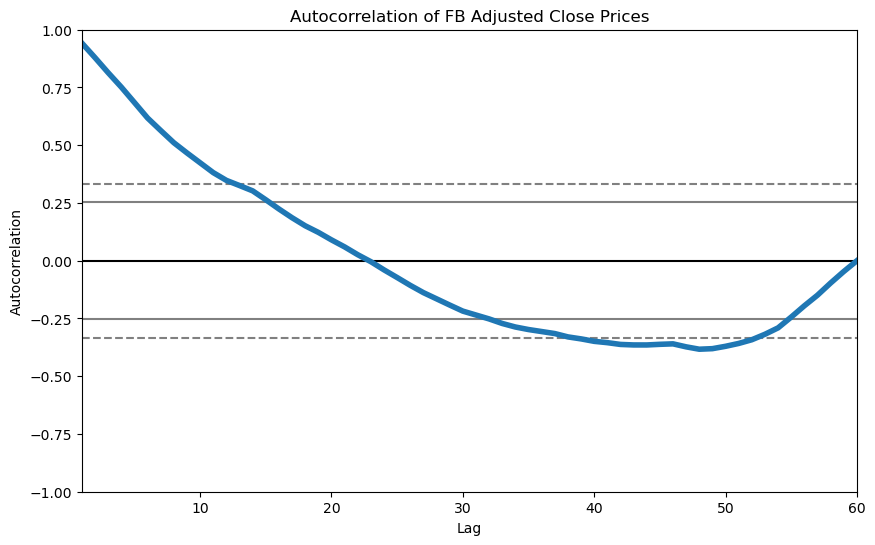

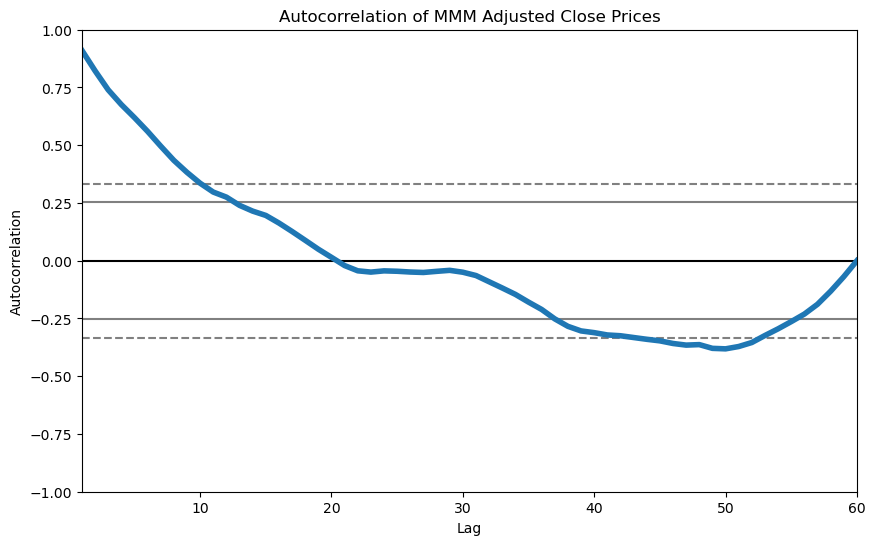

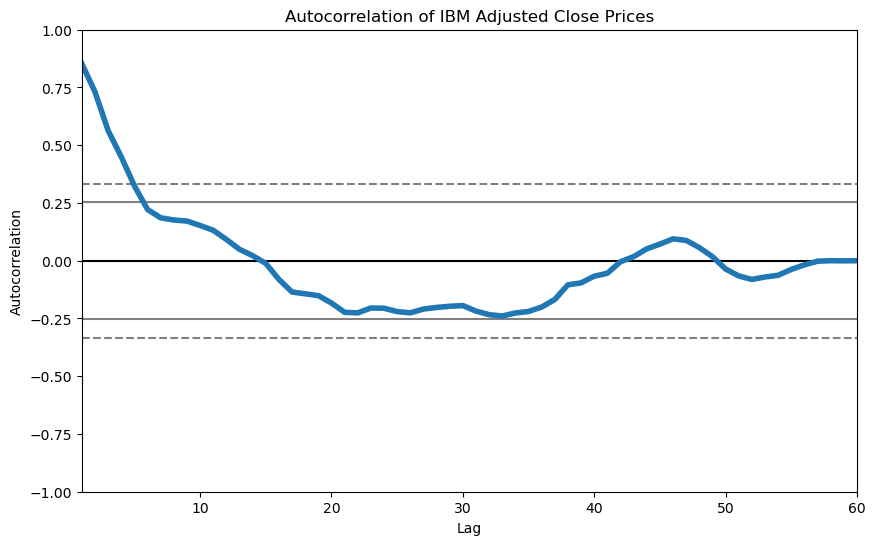

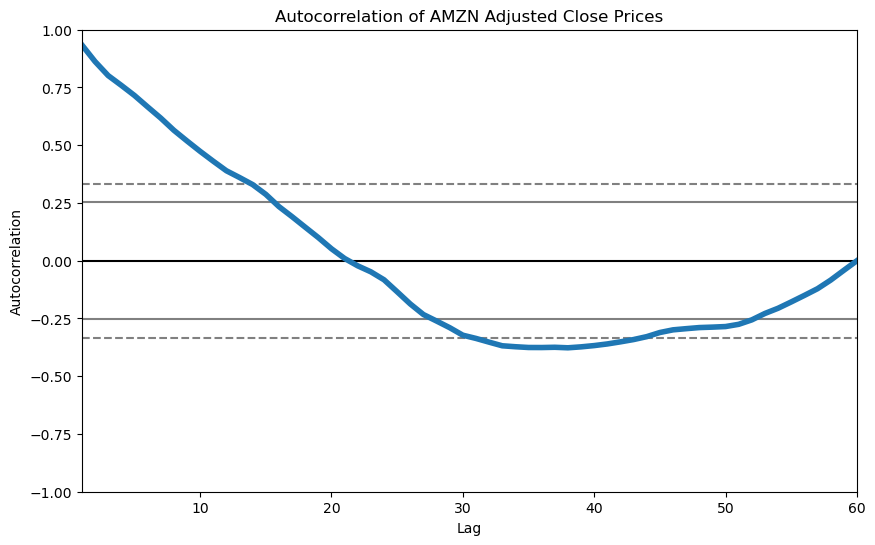

In [ ]:
# Plotting autocorrelation for FB
plt.figure(figsize=(10, 6))
plt.title("Autocorrelation of FB Adjusted Close Prices")
autocorrelation_plot(fb_monthly['adj_close'])
plt.gca().lines[5].set_linewidth(4)  # Setting the plot line thickness to a larger value
plt.grid(False)  # Removing the plot grid
plt.show()

# Plotting autocorrelation for MMM
plt.figure(figsize=(10, 6))
plt.title("Autocorrelation of MMM Adjusted Close Prices")
autocorrelation_plot(mmm_monthly['adj_close'])
plt.gca().lines[5].set_linewidth(4)  # Setting the plot line thickness to a larger value
plt.grid(False)  # Removing the plot grid
plt.show()

# Plotting autocorrelation for IBM
plt.figure(figsize=(10, 6))
plt.title("Autocorrelation of IBM Adjusted Close Prices")
autocorrelation_plot(ibm_monthly['adj_close'])
plt.gca().lines[5].set_linewidth(4)  # Setting the plot line thickness to a larger value
plt.grid(False)  # Removing the plot grid
plt.show()

# Plotting autocorrelation for AMZN
plt.figure(figsize=(10, 6))
plt.title("Autocorrelation of AMZN Adjusted Close Prices")
autocorrelation_plot(amzn_monthly['adj_close'])
plt.gca().lines[5].set_linewidth(4)  # Setting the plot line thickness to a larger value
plt.grid(False)  # Removing the plot grid
plt.show()

#### Conclusions of the Autocorrelation

As learned during the course, autocorrelation measures the relationship between a time series and its lagged values. For adjusted close prices, the autocorrelation is often high at smaller lags because stock prices tend to move in a continuous manner rather than jumping randomly. However, as the lag increases, the autocorrelation usually decreases, indicating that the influence of past prices diminishes over time. Doing some research on the internet I found that this behavior is typical for financial time series data, where short-term dependencies exist but long-term dependencies weaken.

In other words it is common that stock prices often exhibit trends or patterns over time, meaning that the price on one day is influenced by the price on previous days. This results in a positive autocorrelation, particularly at smaller lags (e.g., lag 1, lag 2). Then the autocorrelation declines as the lag increases.

This result is actually observed in the autocorrelation plots for the four stocks. The autocorrelation is high at the beginning (close to positve one), but as the lag increases the autocorreation dimishes (goes close to zero).

### 4. Scatter Matrix

<Figure size 1000x1000 with 0 Axes>

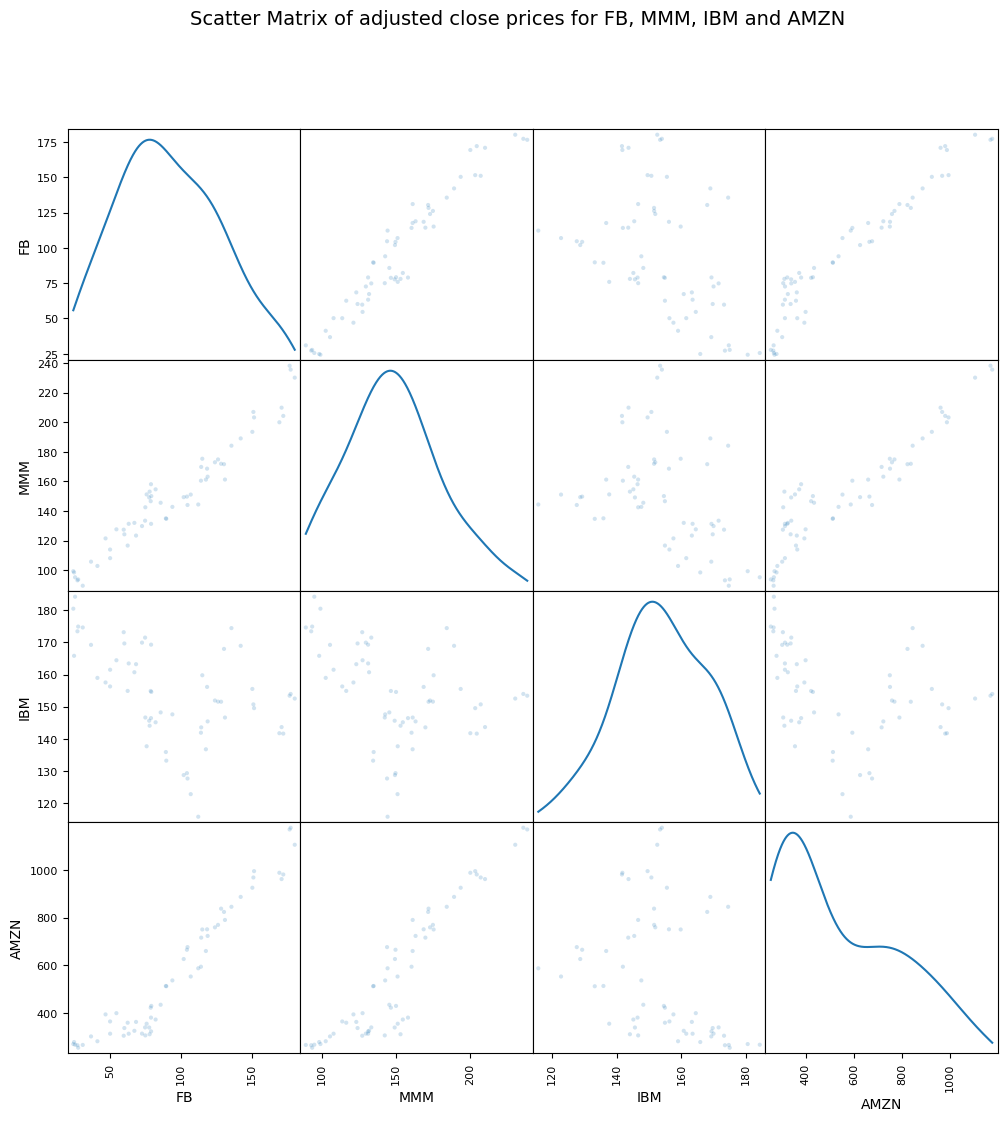

In [ ]:
# Combining the adj_close of all stocks into a single DataFrame
combined_df = pd.DataFrame({
    'FB': fb_monthly['adj_close'],
    'MMM': mmm_monthly['adj_close'],
    'IBM': ibm_monthly['adj_close'],
    'AMZN': amzn_monthly['adj_close']
})

# Drop rows with missing values to ensure clean data (if there are any)
# Note: This step is important to avoid errors in the scatter plot matrix
combined_df = combined_df.dropna()

# Visualize the correlation between the returns using a scatter plot matrix
plt.figure(figsize=(10, 10))
scatter_matrix(combined_df, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.suptitle("Scatter Matrix of adjusted close prices for FB, MMM, IBM and AMZN", fontsize=14)
plt.show()

#### Conclusions of Scatter

As we discussed during the course, scatter plots help visualize the relationships between our variables (in this case the adjusted close prices of different stocks). 

If the points in the scatter plot form an upward-sloping trend (diagonal from bottom-left to top-right - i.e. positive correlation) it means that when one stock price increase the other one also tends to increase. If the points form a downward-sloping trend (i.e. negative correalation) it means that if one variable tends to increase the other one tends to dcrease. Finally. if the points are randomly scatter without a positive or negative patter, then it indicates that there is no correlation between the two variables.

From the analysys shown abobe, we can see that the stocks *FB*, *AMZ* and *MM* show a positve correlation between them (could be explained by the 3 of them are it technology and US-based). Also we can see that the IMB stock shows no correlation between the other stocks (could be explained by IBM represents a more mature market, or similar.). These, were interesting results, nevertheless.

### Option 2 - Using Yahoo Finance `yfinance` library

In [ ]:
'''import yfinance as yf
from pandas_datareader import data as pdr

# 1) Using pandas datareader and Yahoo Finance
yf.pdr_override()

amzn = pdr.get_data_yahoo('AMZN', start = start)
'''

"import yfinance as yf\nfrom pandas_datareader import data as pdr\n\n# 1) Using pandas datareader and Yahoo Finance\nyf.pdr_override()\n\namzn = pdr.get_data_yahoo('AMZN', start = start)\n"

In [ ]:
'''# 2) Using fix_yahoo_finance library only to download AMZN data

amzn = yf.download('AMZN', start=start)
'''

"# 2) Using fix_yahoo_finance library only to download AMZN data\n\namzn = yf.download('AMZN', start=start)\n"

In [ ]:
'''# If we want to download multipe stocks into a single dataframe:

all_stocks_list = ['AMZN', 'FB']
all_stocks = yf.download(all_stocks_list, start = start)
'''

"# If we want to download multipe stocks into a single dataframe:\n\nall_stocks_list = ['AMZN', 'FB']\nall_stocks = yf.download(all_stocks_list, start = start)\n"